In [43]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [44]:
card = '../../image4labs/star.jpg'

img = cv.imread(card)
assert img is not None, "file could not be read, check with os.path.exists()"

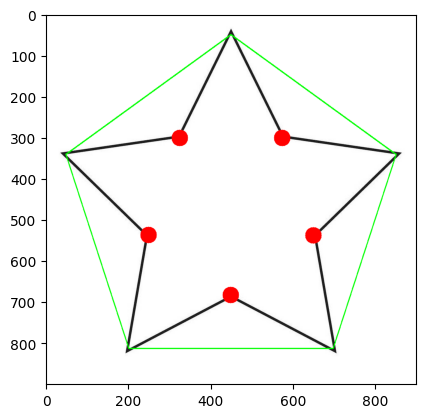

In [45]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(img_gray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, 2, 1)
cnt = contours[0]
hull = cv.convexHull(cnt, returnPoints=False)
defects = cv.convexityDefects(cnt, hull)
for i in range(defects.shape[0]):
    s, e, f, d = defects[i, 0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv.line(img, start, end, [0, 255, 0], 2)
    cv.circle(img, far, 20, [255, 0, 0], -1)

plt.imshow(img)

Эта функция находит кратчайшее расстояние между точкой на изображении и контуром. Она возвращает расстояние, которое отрицательно, когда точка находится вне контура, положительно, когда точка находится внутри, и равно нулю, если точка находится на контуре.


In [46]:
dist = cv.pointPolygonTest(cnt, (50, 50), False)
dist

-1.0

0.026672550845931564


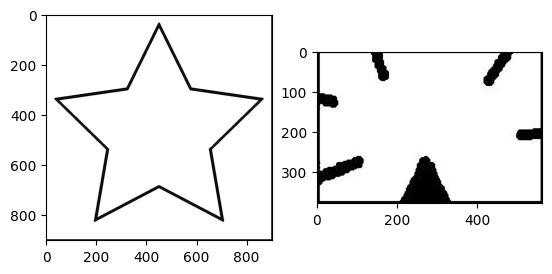

In [ ]:
img1 = cv.imread(
    '../../image4labs/star.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread(
    '../../image4labs/star2.png', cv.IMREAD_GRAYSCALE)
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
ret, thresh = cv.threshold(img1, 127, 255, 0)
ret, thresh2 = cv.threshold(img2, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, 2, 1)
cnt1 = contours[0]
contours, hierarchy = cv.findContours(thresh2, 2, 1)
cnt2 = contours[0]
ret = cv.matchShapes(cnt1, cnt2, 1, 0.0)
print(ret)

plt.subplot(121)
plt.imshow(img1, 'grey')
plt.subplot(122)
plt.imshow(img2, 'grey')
plt.show()